In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress
import statistics
import seaborn as sns
import plotly.express as px

In [ ]:
#data = pd.read_excel("sample_data//Test.xlsx")
#data = pd.read_csv("sample_data//valeursfoncieres-2022.txt",sep="|")
#data = pd.read_excel("Test.xlsx")
data = pd.read_csv("/valeursfoncieres-2022.txt",sep="|")
print(data.columns)
data.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','No disposition'],axis=1, inplace=True)
print(data)

<ipython-input-4-9aa6e9f08562>:4: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/valeursfoncieres-2022.txt",sep="|")


Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')
        Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
0          03/01/2022           Vente

In [ ]:
data["Surface terrain"] = data["Surface terrain"].apply(lambda x: str(x).replace(',', '.'))
data["Valeur fonciere"] = data["Valeur fonciere"].apply(lambda x: str(x).replace(',', '.'))

data["Section"] = data["Section"].astype(str)
surfaceterrain = data["Surface terrain"].dropna()
surfaceterrain = surfaceterrain.astype(float)
valeurfonciere = data["Valeur fonciere"].dropna()
valeurfonciere = valeurfonciere.astype(float)
data["PrixFloat"] = data["Valeur fonciere"].astype(float).fillna(0)
data["PrixInt"] = data["PrixFloat"].astype(int)
data["Surface terrain"] = data["Surface terrain"].astype(float)

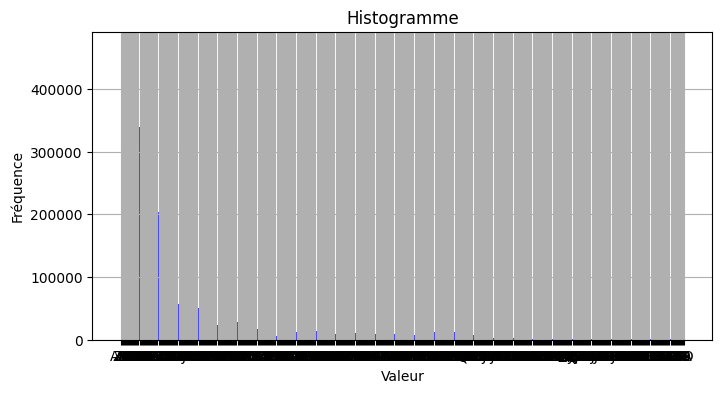

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(data["Section"], bins=30, alpha=0.75, color='blue')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.title('Histogramme')
plt.grid(True)
plt.show()

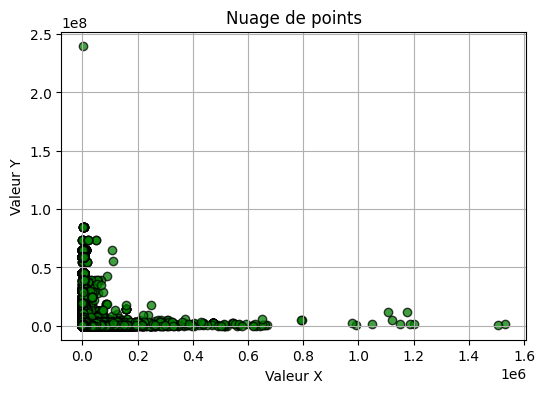

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(surfaceterrain, valeurfonciere, alpha=0.75, color='green', edgecolors='black')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

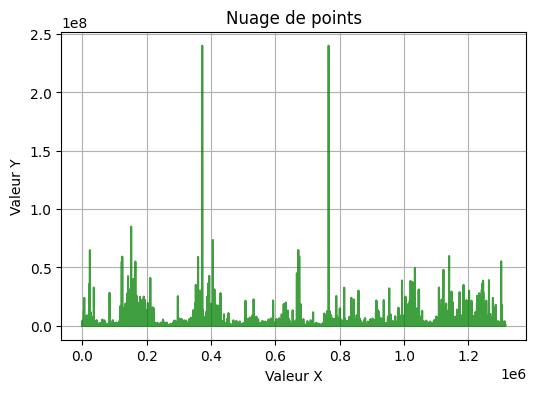

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(valeurfonciere, alpha=0.75, color='green')
plt.xlabel('Valeur X')
plt.ylabel('Valeur Y')
plt.title('Nuage de points')
plt.grid(True)
plt.show()

In [ ]:
date = pd.to_datetime(data['Date mutation'], format="%d/%m/%Y")
month = date.dt.month
data["Date"] = date
data["Month"] = month
data["Days"] = date.dt.day
print(month)

0          1
1          1
2          1
3          1
4          1
          ..
1314717    1
1314718    1
1314719    1
1314720    1
1314721    1
Name: Date mutation, Length: 1314722, dtype: int64


In [ ]:
data.sort_values(by='Date', inplace=True)
print(data)

       Date mutation Nature mutation Valeur fonciere  No voie B/T/Q  \
510815    01/01/2022           Vente       490000.00     10.0   NaN   
510814    01/01/2022           Vente       490000.00     12.0   NaN   
0         03/01/2022           Vente        55000.00     13.0   NaN   
162705    03/01/2022           Vente        92000.00     30.0   NaN   
598681    03/01/2022           Vente       250000.00    843.0   NaN   
...              ...             ...             ...      ...   ...   
510567    31/12/2022           Vente       390000.00      NaN   NaN   
510568    31/12/2022           Vente       390000.00      NaN   NaN   
510569    31/12/2022           Vente       390000.00      NaN   NaN   
510557    31/12/2022           Vente       390000.00      NaN   NaN   
510511    31/12/2022           Vente       390000.00      NaN   NaN   

       Type de voie Code voie                      Voie  Code postal  \
510815          IMP      0072                     CESAR      17200.0   
510

[-2.75973044e-08  1.64693584e+01]
 
-2.76e-08 x + 16.47
21279296311245.918


<ipython-input-40-5006bed6e9f0>:13: RuntimeWarning: overflow encountered in long_scalars
  somme += (data['PrixInt'][i]-polynome(data["Days"][i]))**2


-6782555387763.472


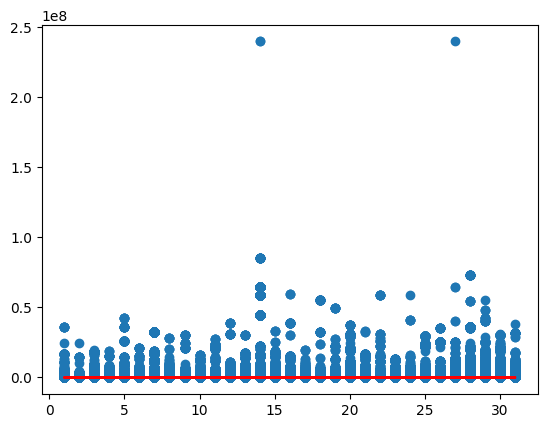

In [ ]:
coefficients = np.polyfit(data["PrixInt"], data["Days"], 1)
print(coefficients)
polynome = np.poly1d(coefficients)
print(polynome)
# Générer la ligne de régression linéaire à partir des coefficients
y_regression = polynome(data["PrixInt"])


#CALCUL DE L'ERREUR
def Calculderreur(polynome):
    somme = 0 
    for i in range(len(data["PrixInt"])):
        somme += (data['PrixInt'][i]-polynome(data["Days"][i]))**2
    somme /= len(data["Days"])
    return somme
print(Calculderreur(polynome))
print(Calculderreur(np.poly1d([2,10])))
plt.plot(data["Days"], y_regression, color='red')
plt.scatter(data["Days"],data["PrixInt"])
plt.show()

In [ ]:
print("Prix moyen : ",data["PrixInt"].mean())
departement = data["Code departement"].drop_duplicates()
print("Liste des département : ",departement)
for i in departement:
    listedesprix = []
    for j in range(len(data["Code departement"])):
      if(str(data["Code departement"][j]) == str(i)):
        listedesprix.append(data["PrixFloat"][j])
    print("Prix moyen pour le département "+str(i)+" : ",statistics.mean(listedesprix))


Prix moyen :  700187.4653348769
Liste des département :  510815     17
0           1
162705      6
598681     19
1282181    34
930154     2B
921816     2A
937026     30
569408     18
619683     21
896486     29
1155295    33
1314131    35
107747      5
35817       2
641077     22
101758      4
256078      9
350340     13
345141     12
238487      8
1083482    32
301941     11
285419     10
997289     31
467260     16
221468      7
451789     14
453777     15
959863     30
700352     24
818243     27
70807       3
684326     23
844971     28
778596     26
770649     25
919808     29
Name: Code departement, dtype: object
Prix moyen pour le département 17 :  268133.60665172513
Prix moyen pour le département 1 :  320872.02829383756
Prix moyen pour le département 6 :  710044.1139118513
Prix moyen pour le département 19 :  118300.26159468916
Prix moyen pour le département 34 :  504346.89466079354
Prix moyen pour le département 2B :  205539.92524434192
Prix moyen pour le département 2A :  462

KeyboardInterrupt: ignored

In [ ]:
def average_price_by_road_type(dept_data):
    # Sélectionner les 5 types de voie les plus fréquents
    top_5_road_types = dept_data['Type de voie'].value_counts().nlargest(5).index

    # Filtrer les données pour inclure uniquement les 5 types de voie les plus fréquents
    filtered_dept_data = dept_data[dept_data['Type de voie'].isin(top_5_road_types)]

    # Calculer les prix moyens pour les 5 types de voie les plus fréquents
    average_prices = filtered_dept_data.groupby('Type de voie')['PrixFloat'].mean()
    return average_prices

ValueError: ignored

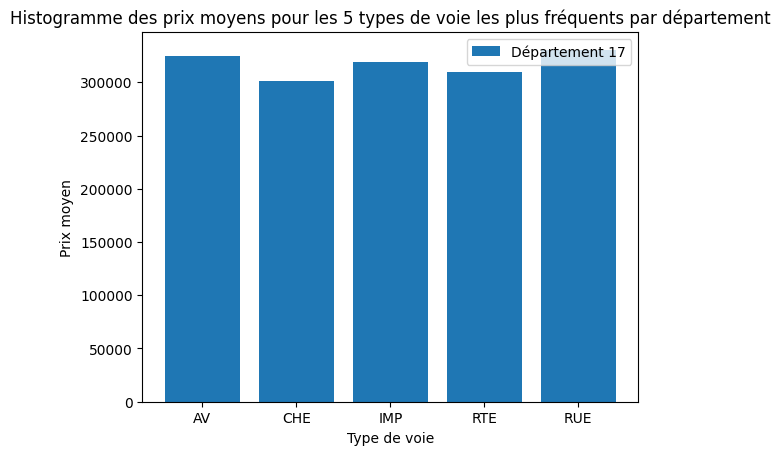

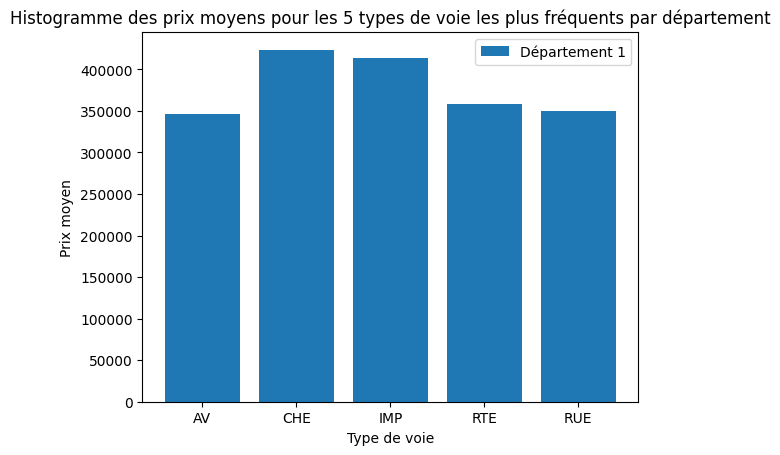

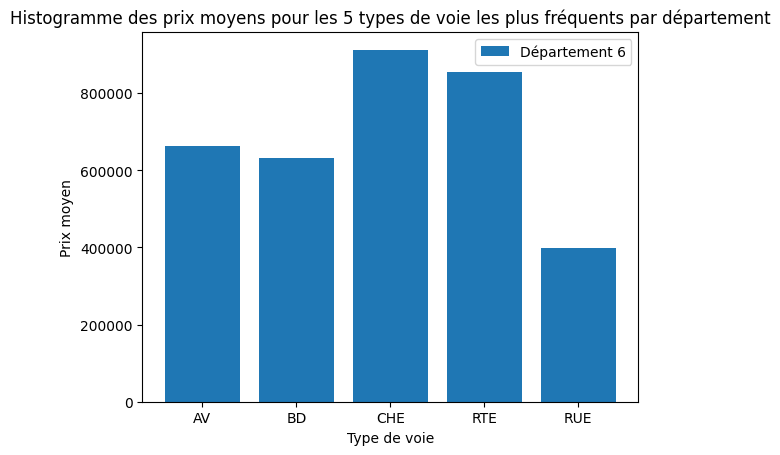

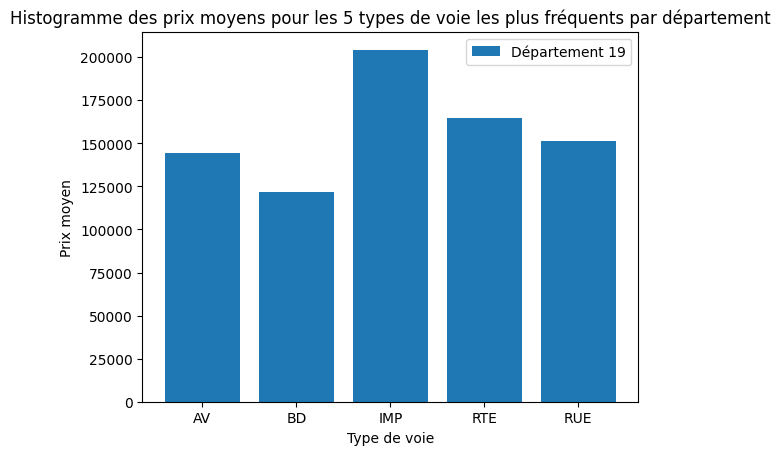

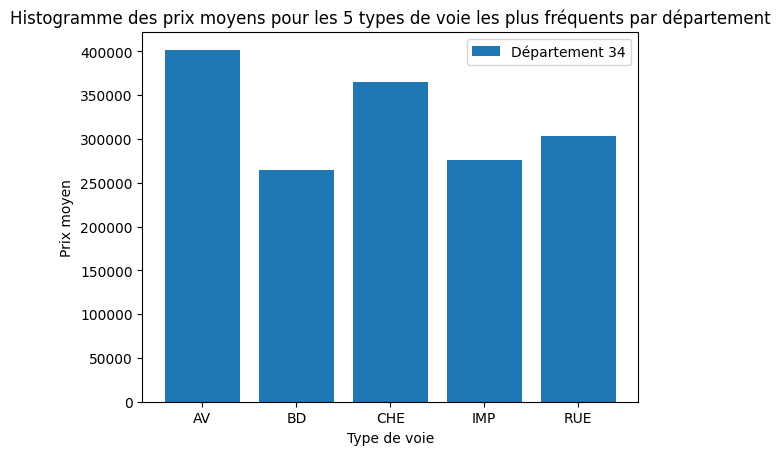

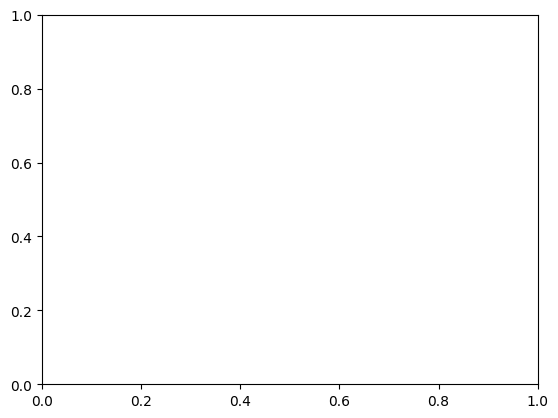

In [ ]:
# Parcourir chaque département et tracer l'histogramme des prix moyens par type de voie
for j in departement:
    fig, ax = plt.subplots()
    dept_data = data[data['Code departement'] == int(j)]
    average_prices = average_price_by_road_type(dept_data)
    
    # Tracer l'histogramme des prix moyens pour le département actuel
    ax.bar(average_prices.index, average_prices, label=f'Département {j}')

    # Configurer les étiquettes des axes et le titre
    ax.set_xlabel("Type de voie")
    ax.set_ylabel("Prix moyen")
    ax.set_title("Histogramme des prix moyens pour les 5 types de voie les plus fréquents par département")

    # Ajouter une légende
    ax.legend()

    # Afficher le graphique
plt.show()

In [ ]:
departement = [75,78,92]
data["Prix/m2"] = data["PrixInt"]/data["Surface terrain"]
for j in departement:
    dept_data = data[data['Code departement'] == int(j)]
    type_counts = dept_data["Type local"].value_counts()
    type_counts_dict = type_counts.to_dict()
    fig, ax = plt.subplots()
    prixenfonctiondulocal = {}
    for u in type_counts_dict.keys():
        dept_datatype = dept_data[dept_data['Type local'] == str(u)]
        prixenfonctiondulocal[u] = dept_datatype["Prix/m2"].median()
    print(prixenfonctiondulocal)
    ax.barh(list(type_counts_dict.keys()), list(type_counts_dict.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Type de local dans le département numéro : "+str(j))
    plt.show()
    fig, ax = plt.subplots()
    ax.barh(list(prixenfonctiondulocal.keys()), list(prixenfonctiondulocal.values()))
    ax.set_xlabel("Nombre d'occurrences")
    ax.set_ylabel("Type")
    ax.set_title("Prix/m² en fonction du type de local dans le département numéro : "+str(j))
    plt.show()

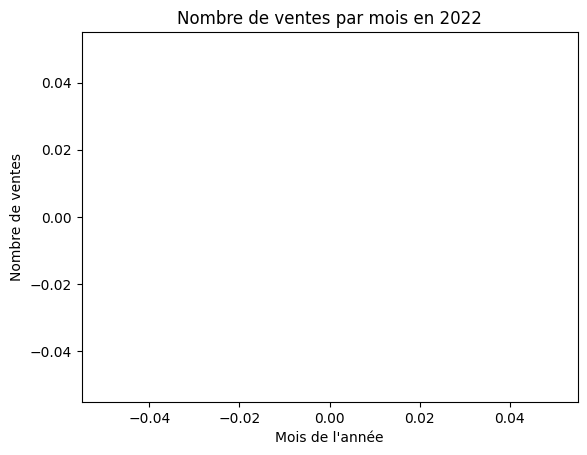

In [ ]:
ventes_par_mois = {}
for _, row in data.iterrows():
    date_str = row['Date mutation']
    valeur_fonciere = row['Valeur fonciere']
    if isinstance(date_str, str) and isinstance(valeur_fonciere, str): # s'assurer que les champs contiennent des données valides
        date = datetime.strptime(date_str, '%d/%m/%Y')
        mois = date.month
        if mois not in ventes_par_mois:
            ventes_par_mois[mois] = 1
        else:
            ventes_par_mois[mois] += 1

mois = []
ventes = []
for k, v in ventes_par_mois.items():
    mois.append(k)
    ventes.append(v)

plt.bar(mois, ventes)
plt.xlabel('Mois de l\'année')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes par mois en 2022')
plt.show()

In [ ]:
# Convertir la colonne "Date mutation" en objet datetime
data["Date mutation"] = pd.to_datetime(data["Date mutation"], format="%d/%m/%Y")

# Créer une colonne "Mois" qui contient le mois de chaque vente
data["Mois"] = data["Date mutation"].dt.month

# Calculer le prix médian des ventes pour chaque mois de l'année
prix_median = data.groupby("Mois")["Valeur fonciere"].median()

# Tracer le graphique de l'évolution du prix médian en fonction du mois
plt.plot(prix_median.index, prix_median.values)
plt.xlabel('Mois de l\'année')
plt.ylabel('Prix médian des ventes')
plt.title('Évolution du prix médian des ventes par mois en 2022')
plt.show()

TypeError: ignored

'\nreprésente la répartition des différents types de locaux pour les biens immobiliers dans votre \nensemble de données. Voici une explication de chaque élément du camembert :\n\n"Appartement" : Cela indique la proportion d\'appartements parmi tous les biens immobiliers présents\n dans les données.\n"Maison" : Cela représente la proportion de maisons parmi tous les biens immobiliers.\n"Dépendance" : Cela représente la proportion de dépendances (par exemple, des garages ou des \n  annexes) parmi tous les biens immobiliers.\n"Local industriel. commercial ou assimilé" : Cela indique la proportion de locaux industriels,\n  commerciaux ou assimilés (par exemple, des entrepôts ou des magasins) parmi tous les biens\n  immobiliers.\n"Local industriel. commercial ou assimilé + appartement" : Cela représente la proportion de biens \n  immobiliers qui sont une combinaison d\'un local industriel, commercial ou assimilé et d\'un \n  appartement.\n"Dépendance + maison" : Cela indique la proportion d

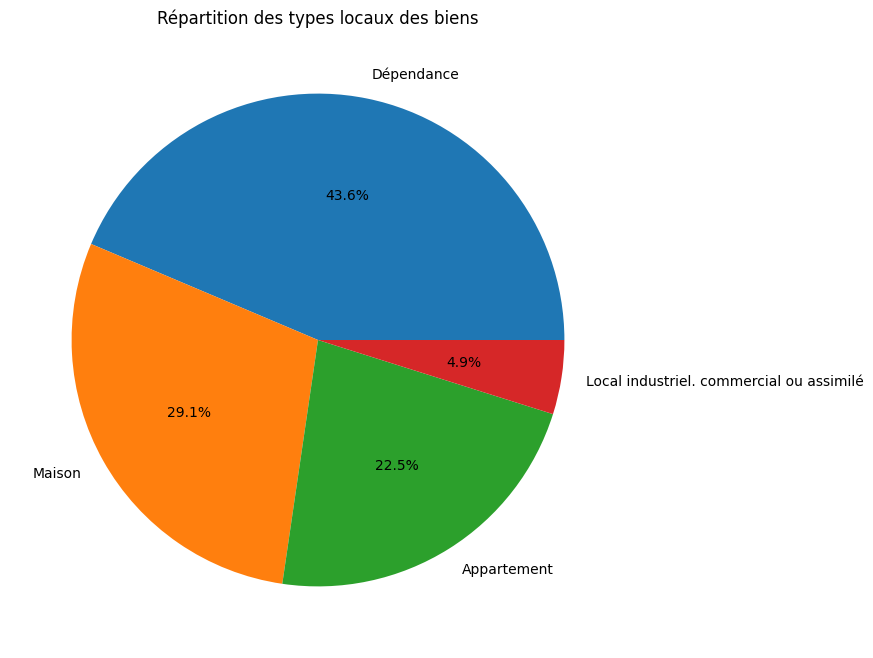

In [ ]:
# Camemberts : Répartition des types locaux des biens
plt.figure(figsize=(8, 8))
data["Type local"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Répartition des types locaux des biens")

"""
représente la répartition des différents types de locaux pour les biens immobiliers dans votre 
ensemble de données. Voici une explication de chaque élément du camembert :

"Appartement" : Cela indique la proportion d'appartements parmi tous les biens immobiliers présents
 dans les données.
"Maison" : Cela représente la proportion de maisons parmi tous les biens immobiliers.
"Dépendance" : Cela représente la proportion de dépendances (par exemple, des garages ou des 
  annexes) parmi tous les biens immobiliers.
"Local industriel. commercial ou assimilé" : Cela indique la proportion de locaux industriels,
  commerciaux ou assimilés (par exemple, des entrepôts ou des magasins) parmi tous les biens
  immobiliers.
"Local industriel. commercial ou assimilé + appartement" : Cela représente la proportion de biens 
  immobiliers qui sont une combinaison d'un local industriel, commercial ou assimilé et d'un 
  appartement.
"Dépendance + maison" : Cela indique la proportion de biens immobiliers qui sont une combinaison 
  d'une dépendance et d'une maison.
Le camembert donne une vue d'ensemble visuelle de la répartition des types locaux des biens 
immobiliers dans vos données. Il vous permet de voir la proportion relative de chaque type de bien,
ce qui peut être utile pour comprendre la composition générale de votre ensemble de données et 
identifier les tendances ou les prédominances.
"""

<Figure size 1000x600 with 0 Axes>

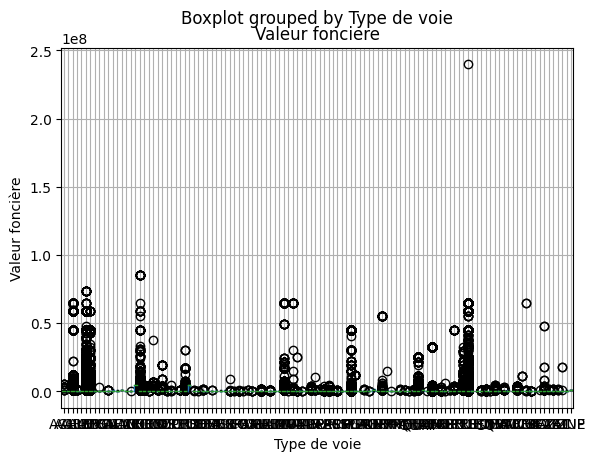

In [ ]:
# Convertir la colonne "Valeur fonciere" en nombre
data["Valeur fonciere"] = pd.to_numeric(data["Valeur fonciere"], errors="coerce")

# Graphique 1 : Boîtes à moustaches pour la valeur foncière par type de voie
plt.figure(figsize=(10, 6))
data.boxplot(column="Valeur fonciere", by="Type de voie")
plt.xlabel("Type de voie")
plt.ylabel("Valeur foncière")

# Afficher le graphique
plt.show()

"""
permet de visualiser la répartition de la valeur foncière en fonction du type de voie dans votre 
ensemble de données.

Voici une explication des éléments clés de la boîte à moustaches :

La boîte représente l'étendue interquartile (IQR) des données, c'est-à-dire la plage où se situent
les 50 % centraux des valeurs. Elle s'étend du premier quartile (Q1) au troisième quartile (Q3). La 
longueur de la boîte représente la dispersion des valeurs dans cette plage.
La ligne à l'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la 
distribution en deux parties égales.
Les "moustaches" s'étendent à partir de la boîte jusqu'aux valeurs situées à l'extérieur de 
l'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes 
qui se trouvent au-delà de la plage des 1,5 fois l'IQR.
Les points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées 
comme des observations atypiques.
En interprétant le graphique, vous pouvez comparer la médiane et la dispersion de la valeur foncière
pour chaque type de voie. Vous pouvez également identifier la présence de valeurs aberrantes ou 
extrêmes qui pourraient influencer la distribution. Cela peut fournir des informations utiles sur 
les variations de la valeur foncière en fonction du type de voie dans votre ensemble de données.
"""

Text(0.5, 1.0, 'Boîtes à moustaches pour la valeur foncière par type local')

<Figure size 1000x600 with 0 Axes>

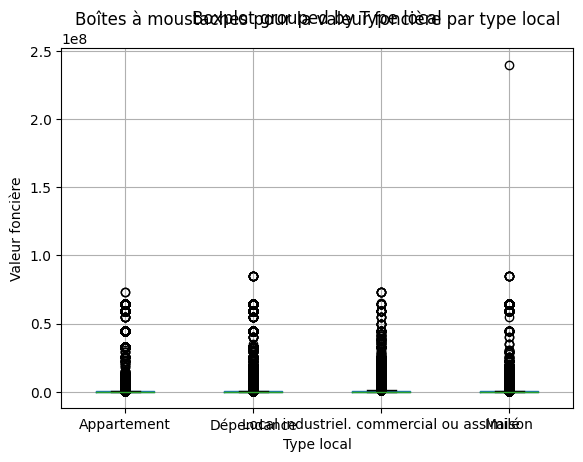

In [ ]:
  # Boîtes à moustaches pour la valeur foncière par type local
  plt.figure(figsize=(10, 6))
  data.boxplot(column="Valeur fonciere", by="Type local")
  plt.xlabel("Type local")
  plt.ylabel("Valeur foncière")
  plt.title("Boîtes à moustaches pour la valeur foncière par type local")


  """
  permet de visualiser la répartition de la valeur foncière en fonction du type de local dans votre
  ensemble de données.

  Voici une explication des éléments clés de la boîte à moustaches :

  La boîte représente l'étendue interquartile (IQR) des données, c'est-à-dire la plage où se situent 
  les 50 % centraux des valeurs. Elle s'étend du premier quartile (Q1) au troisième quartile (Q3). La
  longueur de la boîte représente la dispersion des valeurs dans cette plage.
  La ligne à l'intérieur de la boîte représente la médiane, qui indique la valeur qui divise la 
  istribution en deux parties égales.
  Les "moustaches" s'étendent à partir de la boîte jusqu'aux valeurs situées à l'extérieur de 
  l'étendue interquartile. Elles peuvent représenter des valeurs aberrantes ou des valeurs extrêmes 
  qui se trouvent au-delà de la plage des 1,5 fois l'IQR.
  Les points individuels situés en dehors des moustaches sont des valeurs aberrantes, considérées 
  comme des observations atypiques.
  En interprétant le graphique, vous pouvez comparer la médiane et la dispersion de la valeur foncière 
  pour chaque type de local. Vous pouvez également identifier la présence de valeurs aberrantes ou 
  extrêmes qui pourraient influencer la distribution. Cela peut fournir des informations utiles sur 
  les variations de la valeur foncière en fonction du type de local dans votre ensemble de données.
  """

Text(0.5, 1.0, 'Répartition des types de culture des terrains')

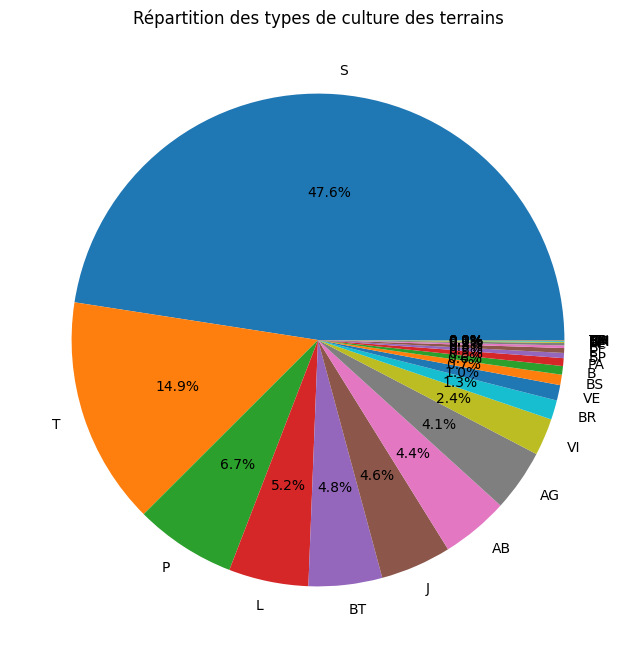

In [ ]:
# Camemberts : Répartition des types de culture des terrains
plt.figure(figsize=(8, 8))
data["Nature culture"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Répartition des types de culture des terrains")

"""
Représente la répartition des types de culture des terrains à partir des données fournies dans le 
document. Chaque portion du camembert représente un type de culture spécifique, et la taille de 
chaque portion est proportionnelle à la fréquence d'apparition de ce type de culture dans les 
données.
Le camembert affiche visuellement la répartition de ces types de culture en utilisant des portions 
circulaires. Chaque portion est étiquetée avec le nom du type de culture et le pourcentage 
correspondant à la fréquence d'apparition de ce type de culture par rapport au total.

Par exemple, si le camembert indique "Agriculture: 40.0%", cela signifie que le type de culture 
"Agriculture" représente 40% de la répartition totale des types de culture des terrains.

"""